In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns

In [150]:
# Fuentes sacadas del INE
fuente_2 = "../data/evolucion_del_precio_de_la_vivienda_en_madrid.csv"
df_2 = pd.read_csv(fuente_2, sep=";")
fuente_3 = "../data/la_renta_bruta_media_de_madrid.csv"
df_3 = pd.read_csv(fuente_3, sep=";")
fuente_4 = "../data/ipva_mad_tam.csv"
df_4 = pd.read_table(fuente_4, sep=";")
fuente_5 = "../data/ipva_mad_vivienda.csv"
df_5 = pd.read_csv(fuente_5, sep=";")
fuente_6 = "../data/ipva_mad_contrato.csv"
df_6 = pd.read_csv(fuente_6,  sep=";")
# Fuente recogida en dataset de apartamentos turisticos en Madrid
fuente_7 = "../data/alojamientos-turisticos-sample.csv"
df_7 = pd.read_csv(fuente_7)
# Fuente media renta en madrid INE
fuente_8 = "../data/salario_mad_medio.csv"
df_8 = pd.read_csv(fuente_8, sep=";")

In [151]:
df_2

,Año,Periodo,Madrid﻿,España
0,2007,Trimestre 2,"3.497,8",NaN
1,2007,Trimestre 3,"3.551,19",NaN
2,2007,Trimestre 4,"3.364,98",NaN
3,2008,Trimestre 1,"3.323,59",NaN
4,2008,Trimestre 2,"3.268,73",NaN
...,...,...,...,...
263,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN
265,"Url:""https://www.epdata.es/comparacion-evoluci...",NaN,NaN,NaN
266,"Titulo:""Evolución del precio de la vivienda en...",NaN,NaN,NaN


In [152]:
df_2.head(248)

,Año,Periodo,Madrid﻿,España
0,2007,Trimestre 2,"3.497,8",NaN
1,2007,Trimestre 3,"3.551,19",NaN
2,2007,Trimestre 4,"3.364,98",NaN
3,2008,Trimestre 1,"3.323,59",NaN
4,2008,Trimestre 2,"3.268,73",NaN
...,...,...,...,...
243,2023,Junio,NaN,1.622
244,2023,Julio,NaN,1.617
245,NaN,NaN,NaN,NaN
246,NaN,NaN,NaN,NaN


In [153]:
df_2.columns = ["anno", "period", "madrid", "spain"]
df_2.drop(axis=1, columns="spain",inplace=True)
df_2.drop(axis=0, index=df_2.loc[245:].index,inplace=True )

In [154]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   anno    245 non-null    object
 1   period  245 non-null    object
 2   madrid  46 non-null     object
dtypes: object(3)
memory usage: 5.9+ KB


In [155]:
df_2["madrid"] = df_2["madrid"].str.replace(".", "")
df_2["madrid"] = df_2["madrid"].str.replace(",", ".")
df_2

,anno,period,madrid
0,2007,Trimestre 2,3497.8
1,2007,Trimestre 3,3551.19
2,2007,Trimestre 4,3364.98
3,2008,Trimestre 1,3323.59
4,2008,Trimestre 2,3268.73
...,...,...,...
240,2023,Marzo,NaN
241,2023,Abril,NaN
242,2023,Mayo,NaN
243,2023,Junio,NaN


In [156]:
df_2["madrid"] = pd.to_numeric(df_2["madrid"], errors="coerce")
df_2


,anno,period,madrid
0,2007,Trimestre 2,3497.80
1,2007,Trimestre 3,3551.19
2,2007,Trimestre 4,3364.98
3,2008,Trimestre 1,3323.59
4,2008,Trimestre 2,3268.73
...,...,...,...
240,2023,Marzo,NaN
241,2023,Abril,NaN
242,2023,Mayo,NaN
243,2023,Junio,NaN


In [157]:
df_2[df_2["madrid"].notna()].groupby("anno")["madrid"].agg(np.mean)

/var/folders/28/8cl0hx0s7wn3jhrkn9jsr1780000gp/T/ipykernel_79818/3037090138.py:1: FutureWarning: The provided callable <function mean at 0x10a75d8a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_2[df_2["madrid"].notna()].groupby("anno")["madrid"].agg(np.mean)


anno
2007    3471.323333
2008    3275.890000
2009    2914.527500
2010    2839.322500
2011    2585.977500
2012    2210.010000
2013    2042.337500
2014    2008.442500
2015    2073.112500
2016    2252.305000
2017    2481.735000
2018    2805.410000
Name: madrid, dtype: float64

TypeError: agg function failed [how->mean,dtype->object]

/Users/javierdealcazar/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from current font.
  func(*args, **kwargs)
/Users/javierdealcazar/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65279 (\N{ZERO WIDTH NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


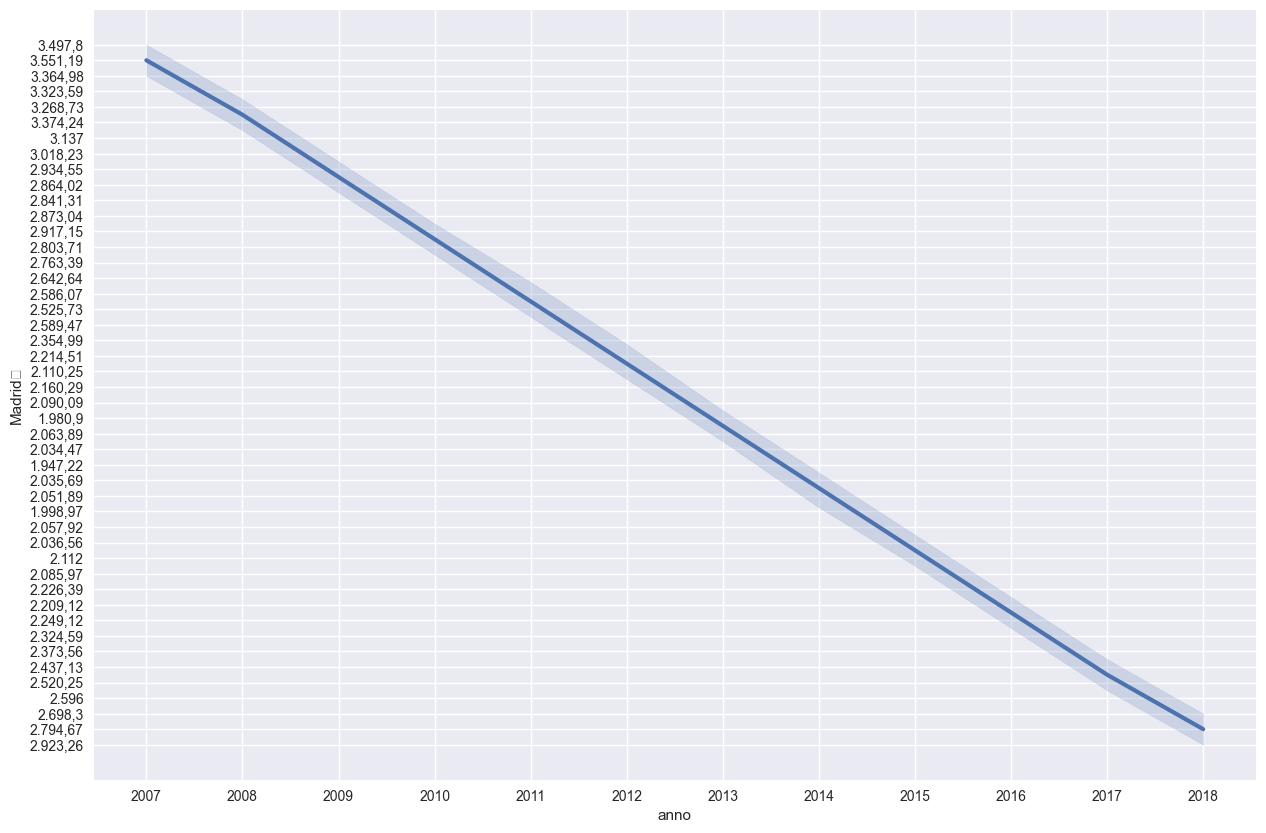

In [42]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_2,
             x="anno",
             y="Madrid\ufeff",
            linewidth = 3);